In [87]:
# I want to model and simulate the emf around a wire. The simulation will show the wire from the tip. A circular shape around will grow to positive maximum and shrink to zero then grow to negative maximum in a different color. this will simulate an alternate current with frequency 50hertz

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from IPython.display import HTML


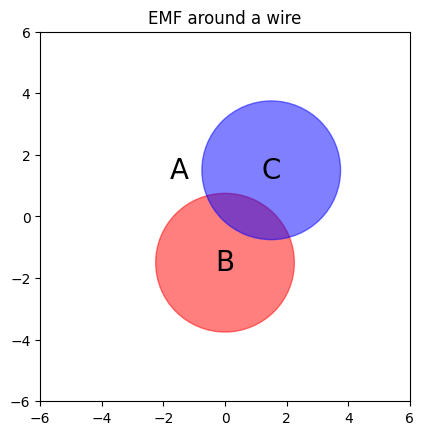

In [88]:
# create a model for the wire
# the wire will be a circle with radius 1
# the wire will carry a current of 1 ampere with 50 hertz frequency

# show the positive Maximum EMF with bulue color with 5 cm radius
# show the negative Maximum EMF with red color with 5 cm radius

# define the angular frequency
f = .5

# define the angular frequency
w = 2*np.pi*f

# define the maximum emf
emf_max = 2.6

def emf_radius(t):
    a_phase = emf_max*np.sin(w*t)
    # b_phase should be 120 degrees lagging a_phase
    b_phase = emf_max*np.sin(w*t - 2*np.pi/3)
    # c_phase should be 240 degrees lagging a_phase
    c_phase = emf_max*np.sin(w*t - 4*np.pi/3)
    params = {'a_phase': a_phase, 'b_phase': b_phase, 'c_phase': c_phase}
    return params


# make a plot will show the growing and shrinking of the emf circle
# the plot will be a 2d plot with x and y axis
# the plot will be animated with time
# the plot will show the wire from the tip

# define a function to animate the plot

def animate(i):

    # clear the plot
    ax.clear()

    # shwo axis square
    ax.set_aspect('equal')

    # draw A letter at the center of the wire
    ax.text(-1.5, 1.5, 'A', fontsize=20, color='black', ha='center', va='center')

    # draw B letter at the center of the wire
    ax.text(0, -1.5, 'B', fontsize=20, color='black', ha='center', va='center')

    # draw C letter at the center of the wire
    ax.text(1.5, 1.5, 'C', fontsize=20, color='black', ha='center', va='center')

    # draw the emf circle
    # make fill blue fill color for positive emf and red fill color for negative emf
    t = i/100 # time in milliseconds

    params = emf_radius(t)
    a_phase = params['a_phase']
    b_phase = params['b_phase']
    c_phase = params['c_phase']


    if a_phase > 0:
        ax.add_patch(plt.Circle((-1.5, 1.5), a_phase, color='blue', fill=True, alpha=.5))
    else:
        ax.add_patch(plt.Circle((-1.5, 1.5), abs(a_phase), color='red', fill=True, alpha=.5))

    if b_phase > 0:
        ax.add_patch(plt.Circle((0, -1.5), b_phase, color='blue', fill=True, alpha=.5))
    else:
        ax.add_patch(plt.Circle((0, -1.5), abs(b_phase), color='red', fill=True, alpha=.5))

    if c_phase > 0:
        ax.add_patch(plt.Circle((1.5, 1.5), c_phase, color='blue', fill=True, alpha=.5))
    else:
        ax.add_patch(plt.Circle((1.5, 1.5), abs(c_phase), color='red', fill=True, alpha=.5))


    # set the plot limits
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    # set the plot title
    ax.set_title('EMF around a wire')

# create the plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# create the animation
anim = animation.FuncAnimation(fig, animate, frames=600, interval=20)

# show the animation
HTML(anim.to_html5_video())

